# Validate Data

In [1]:
import xarray as xr
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob

In [2]:
fpath_obs = '../../../Debias/obs'
fpath_orig = '../../../Debias/cmip6_cleaned'
fpath_debiased = '../../../Debias/cmip6_debiased' 
fpath_downscale = '../../../Debias/cmip6_downscaled'

In [3]:
pr_files = glob.glob(os.path.join(fpath_orig, '*', 'pr', '*'))

## Precipitation

Text(0.5, 1.0, 'Annual Precip - Original Projections')

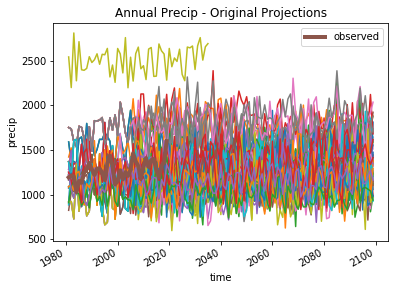

In [8]:
obs =  xr.open_dataset(os.path.join(fpath_obs, 'pr_CHIRPS05_1981_2019.nc'), chunks='auto')
mask_lat = np.logical_and(obs.latitude.values >= 4.5,
                                  obs.latitude.values <= 9.5)
mask_lon = np.logical_and(obs.longitude.values >= 35.5,
                                  obs.longitude.values <= 38.5) 
da = obs['precip'][:, mask_lat, mask_lon].load()
ds_obs = da.mean(dim=('longitude', 'latitude'))
ds_obs_res = ds_obs.resample(time='AS').sum()
obs.close()


for i in range(len(pr_files)):
    obs =  xr.open_dataset(os.path.join(pr_files[i]))
    mask_lat = np.logical_and(obs.lat.values >= 4.5, obs.lat.values <= 9.5)
    mask_lon = np.logical_and(obs.lon.values >= 35.5, obs.lon.values <= 38.5) 
    da = obs['pr'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('lon', 'lat'))
    obs.close()

    ds_res = ds.resample(time='AS').sum()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Annual Precip - Original Projections')

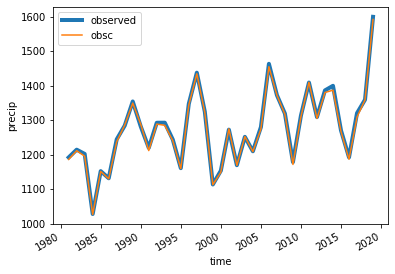

In [12]:
# compare coarsened value 
obsc =  xr.open_dataset(os.path.join( '../../../Debias/obs_resample', 'pr_CHIRPS05_1981_2019_p05deg_remapbic.nc'), chunks='auto')
mask_lat = np.logical_and(obsc.latitude.values >= 4.5, obsc.latitude.values <= 9.5)
mask_lon = np.logical_and(obsc.longitude.values >= 35.5, obsc.longitude.values <= 38.5) 
da = obsc['precip'][:, mask_lat, mask_lon].load()
ds_obsc = da.mean(dim=('longitude', 'latitude'))
ds_obsc_res = ds_obsc.resample(time='AS').sum()
obsc.close()

ds_obs_res.plot(label='observed', linewidth=4)
ds_obsc_res.plot(label='obsc')
plt.legend()

Text(0.5, 1.0, 'Annual Precip - Debiased Projections')

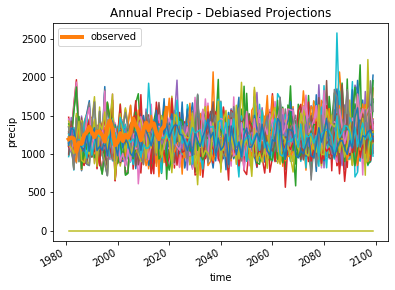

In [16]:
pr_debiased = glob.glob(os.path.join(fpath_debiased, 'pr', '*'))


for i in range(len(pr_debiased)):
    obs =  xr.open_dataset(os.path.join(pr_debiased[i]))
    mask_lat = np.logical_and(obs.lat.values >= 4.5, obs.lat.values <= 9.5)
    mask_lon = np.logical_and(obs.lon.values >= 35.5, obs.lon.values <= 38.5) 
    da = obs['pr'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('lon', 'lat'))
    obs.close()

    ds_res = ds.resample(time='AS').sum()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Annual Precip - Debiased Projections')

Text(0.5, 1.0, 'Annual Precip - Downscaled Projections')

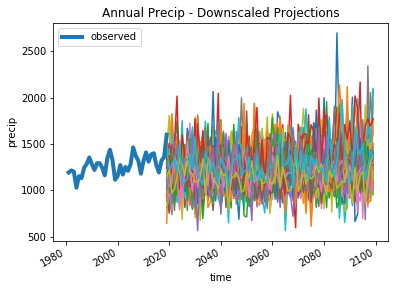

In [18]:
pr_downscaled = glob.glob(os.path.join(fpath_downscale, 'pr_01', '*'))


for i in range(len(pr_downscaled)):
    obs =  xr.open_dataset(os.path.join(pr_downscaled[i]))
    mask_lat = np.logical_and(obs.latitude.values >= 4.5, obs.latitude.values <= 9.5)
    mask_lon = np.logical_and(obs.longitude.values >= 35.5, obs.longitude.values <= 38.5) 
    da = obs['pr'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('longitude', 'latitude'))
    obs.close()

    ds_res = ds.resample(time='AS').sum()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Annual Precip - Downscaled Projections')

## Tasmin

<xarray.Dataset>
Dimensions:    (latitude: 121, longitude: 131, time: 14244)
Coordinates:
  * time       (time) datetime64[ns] 1981-01-01 1981-01-02 ... 2019-12-31
  * longitude  (longitude) float32 29.0 29.1 29.2 29.3 ... 41.7 41.8 41.9 42.0
  * latitude   (latitude) float32 13.0 12.9 12.8 12.7 12.6 ... 1.3 1.2 1.1 1.0
Data variables:
    t2m        (time, latitude, longitude) float32 dask.array<chunksize=(1187, 121, 131), meta=np.ndarray>


Text(0.5, 1.0, 'Average Tmin - Original Projections')

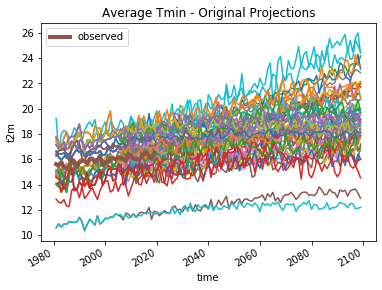

In [22]:
obs =  xr.open_dataset(os.path.join(fpath_obs, 'tasmin_ERA5_1981_2019.nc'), chunks='auto')
mask_lat = np.logical_and(obs.latitude.values >= 4.5,
                          obs.latitude.values <= 9.5)
mask_lon = np.logical_and(obs.longitude.values >= 35.5,
                          obs.longitude.values <= 38.5) 
da = obs['t2m'][:, mask_lat, mask_lon].load()
ds_obs = da.mean(dim=('longitude', 'latitude'))
ds_obs_res = ds_obs.resample(time='AS').mean()
obs.close()


tasmin_files = glob.glob(os.path.join(fpath_orig, '*', 'tasmin', '*'))

for i in range(len(tasmin_files)):
    obs =  xr.open_dataset(os.path.join(tasmin_files[i]))
    mask_lat = np.logical_and(obs.lat.values >= 4.5, obs.lat.values <= 9.5)
    mask_lon = np.logical_and(obs.lon.values >= 35.5, obs.lon.values <= 38.5)  
    da = obs['tasmin'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('lon', 'lat'))
    obs.close()

    ds_res = ds.resample(time='AS').mean()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmin - Original Projections')

Text(0.5, 1.0, 'Average Tmin - Debiased Projections')

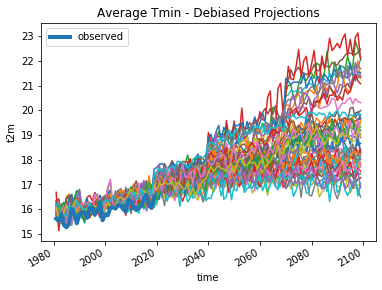

In [23]:
tasmin_debiased = glob.glob(os.path.join(fpath_debiased, 'tasmin', '*'))

for i in range(len(tasmin_debiased)):
    obs =  xr.open_dataset(os.path.join(tasmin_debiased[i]))
    mask_lat = np.logical_and(obs.lat.values >= 4.5, obs.lat.values <= 9.5)
    mask_lon = np.logical_and(obs.lon.values >= 35.5, obs.lon.values <= 38.5)  
    da = obs['tasmin'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('lon', 'lat'))
    obs.close()

    ds_res = ds.resample(time='AS').mean()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmin - Debiased Projections')

Text(0.5, 1.0, 'Average Tmin - Downscaled Projections')

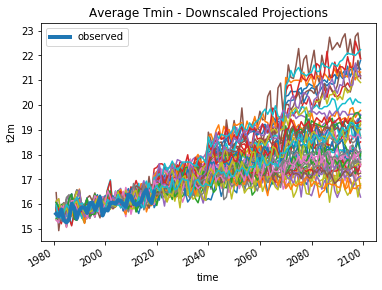

In [26]:
fpath_downscale = '../../../Debias/cmip6_downscaled_v01'

tasmin_downscaled = glob.glob(os.path.join(fpath_downscale, 'tasmin_arch', '*'))

for i in range(len(tasmin_downscaled)):
    obs =  xr.open_dataset(os.path.join(tasmin_downscaled[i]))
    mask_lat = np.logical_and(obs.latitude.values >= 4.5, obs.latitude.values <= 9.5)
    mask_lon = np.logical_and(obs.longitude.values >= 35.5, obs.longitude.values <= 38.5)   
    da = obs['tasmin'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('longitude', 'latitude'))
    obs.close()

    ds_res = ds.resample(time='AS').mean()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmin - Downscaled Projections')

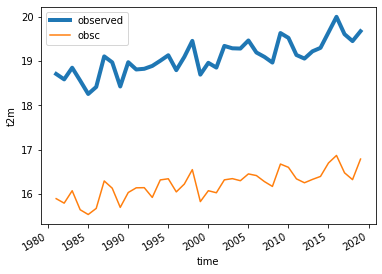

In [9]:
# compare coarsened value 
obsc =  xr.open_dataset(os.path.join( '../../../Debias/obs_resample', 'tasmin_ERA5_1981_2019_p10deg_remapbic.nc'), chunks='auto')
mask_lat = np.logical_and(obsc.latitude.values >= 4,
                                  obsc.latitude.values <= 10)
mask_lon = np.logical_and(obsc.longitude.values >= 32,
                                  obsc.longitude.values <= 39) 
da = obsc['t2m'][:, mask_lat, mask_lon].load()
ds_obsc = da.mean(dim=('longitude', 'latitude'))
ds_obsc_res = ds_obsc.resample(time='AS').mean()
obsc.close()

ds_obs_res.plot(label='observed', linewidth=4)
ds_obsc_res.plot(label='obsc')
plt.legend()

## Tasmax 

Text(0.5, 1.0, 'Average Tmax - Original Projections')

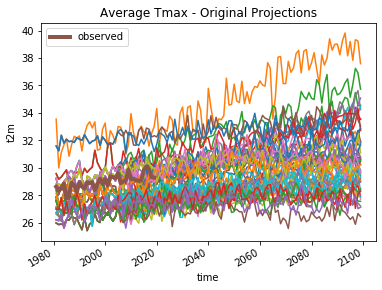

In [4]:
obs =  xr.open_dataset(os.path.join(fpath_obs, 'tasmax_ERA5_1981_2019.nc'), chunks='auto')
mask_lat = np.logical_and(obs.latitude.values >= 4,
                                  obs.latitude.values <= 10)
mask_lon = np.logical_and(obs.longitude.values >= 32,
                                  obs.longitude.values <= 39) 
da = obs['t2m'][:, mask_lat, mask_lon].load()
ds_obs = da.mean(dim=('longitude', 'latitude'))
ds_obs_res = ds_obs.resample(time='AS').mean()
obs.close()


tasmax_files = glob.glob(os.path.join(fpath_orig, '*', 'tasmax', '*'))

for i in range(len(tasmax_files)):
    obs =  xr.open_dataset(os.path.join(tasmax_files[i]))
    mask_lat = np.logical_and(obs.lat.values >= 4, obs.lat.values <= 10)
    mask_lon = np.logical_and(obs.lon.values >= 32, obs.lon.values <= 39) 
    da = obs['tasmax'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('lon', 'lat'))
    obs.close()

    ds_res = ds.resample(time='AS').mean()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmax - Original Projections')

Text(0.5, 1.0, 'Average Tmax - downscale test ')

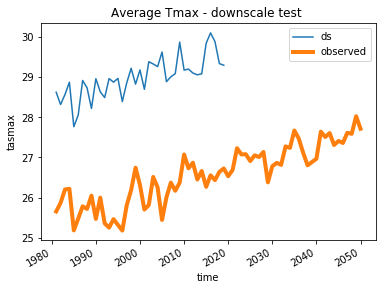

In [7]:
# test 
obsc =  xr.open_dataset(os.path.join('test.nc'), chunks='auto')
mask_lat = np.logical_and(obsc.latitude.values >= 4,
                                  obsc.latitude.values <= 10)
mask_lon = np.logical_and(obsc.longitude.values >= 32,
                                  obsc.longitude.values <= 39) 
da = obsc['tasmax'][:, mask_lat, mask_lon].load()
ds_obsc = da.mean(dim=('longitude', 'latitude'))
ds_obsc_res = ds_obsc.resample(time='AS').mean()
obsc.close()

ds_obs_res.plot(label="ds")
ds_obsc_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmax - downscale test ')

Text(0.5, 1.0, 'Average Tmax - Debiased Projections')

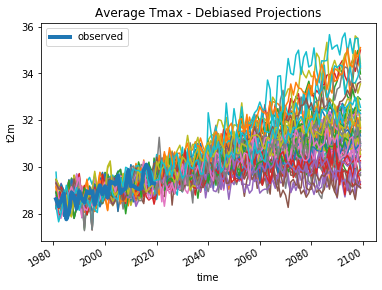

In [21]:
tasmax_debiased = glob.glob(os.path.join(fpath_debiased, 'tasmax', '*'))

for i in range(len(tasmax_debiased)):
    obs =  xr.open_dataset(os.path.join(tasmax_debiased[i]))
    mask_lat = np.logical_and(obs.lat.values >= 4, obs.lat.values <= 10)
    mask_lon = np.logical_and(obs.lon.values >= 32, obs.lon.values <= 39) 
    da = obs['tasmax'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('lon', 'lat'))
    obs.close()

    ds_res = ds.resample(time='AS').mean()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmax - Debiased Projections')

Text(0.5, 1.0, 'Average Tmax - Downscaled Projections')

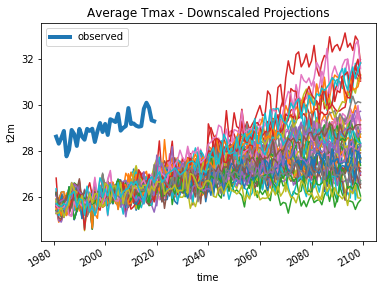

In [23]:
tasmax_downscaled = glob.glob(os.path.join(fpath_downscale, 'tasmax', '*'))

for i in range(len(tasmax_downscaled)):
    obs =  xr.open_dataset(os.path.join(tasmax_downscaled[i]))
    mask_lat = np.logical_and(obs.latitude.values >= 4, obs.latitude.values <= 10)
    mask_lon = np.logical_and(obs.longitude.values >= 32, obs.longitude.values <= 39) 
    da = obs['tasmax'][:, mask_lat, mask_lon].load()
    ds = da.mean(dim=('longitude', 'latitude'))
    obs.close()

    ds_res = ds.resample(time='AS').mean()

    ds_res.plot()

ds_obs_res.plot(label='observed', linewidth=4)
plt.legend()
plt.title('Average Tmax - Downscaled Projections')

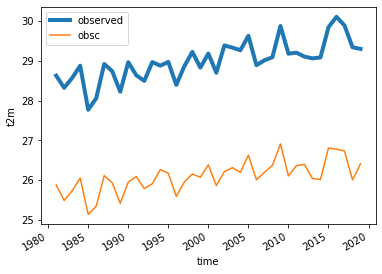

In [11]:
# compare coarsened value 
obsc =  xr.open_dataset(os.path.join( '../../../Debias/obs_resample', 'tasmax_ERA5_1981_2019_p10deg_remapbic.nc'), chunks='auto')
mask_lat = np.logical_and(obsc.latitude.values >= 4,
                                  obsc.latitude.values <= 10)
mask_lon = np.logical_and(obsc.longitude.values >= 32,
                                  obsc.longitude.values <= 39) 
da = obsc['t2m'][:, mask_lat, mask_lon].load()
ds_obsc = da.mean(dim=('longitude', 'latitude'))
ds_obsc_res = ds_obsc.resample(time='AS').mean()
obsc.close()

ds_obs_res.plot(label='observed', linewidth=4)
ds_obsc_res.plot(label='obsc')
plt.legend()